# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

# Create fake data with the Gaussian distribution

In [3]:
# X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_classes=2, random_state=100)
X, y = make_gaussian_quantiles(mean=None, cov=1.0, n_samples=1000, n_features=3, n_classes=3, shuffle=True, random_state=None)

In [4]:
df_X = pd.DataFrame(X, columns=['Column_A', 'Column_B', 'Column_C'])
df_y = pd.DataFrame(y, columns=['Classes'])
df = pd.concat([df_X, df_y], axis = 1)
df

,Column_A,Column_B,Column_C,Classes
0,-0.492645,1.134343,-1.329006,1
1,-0.011091,2.138647,-1.306143,2
2,1.590277,0.950870,-0.887424,2
3,0.520508,-0.481123,0.686943,0
4,0.719079,1.258054,-0.330269,1
...,...,...,...,...
995,-1.201402,0.064848,1.204119,1
996,-1.148637,0.129090,-0.790904,1
997,1.318351,1.810414,-1.786775,2
998,-0.720182,1.195748,0.896541,1


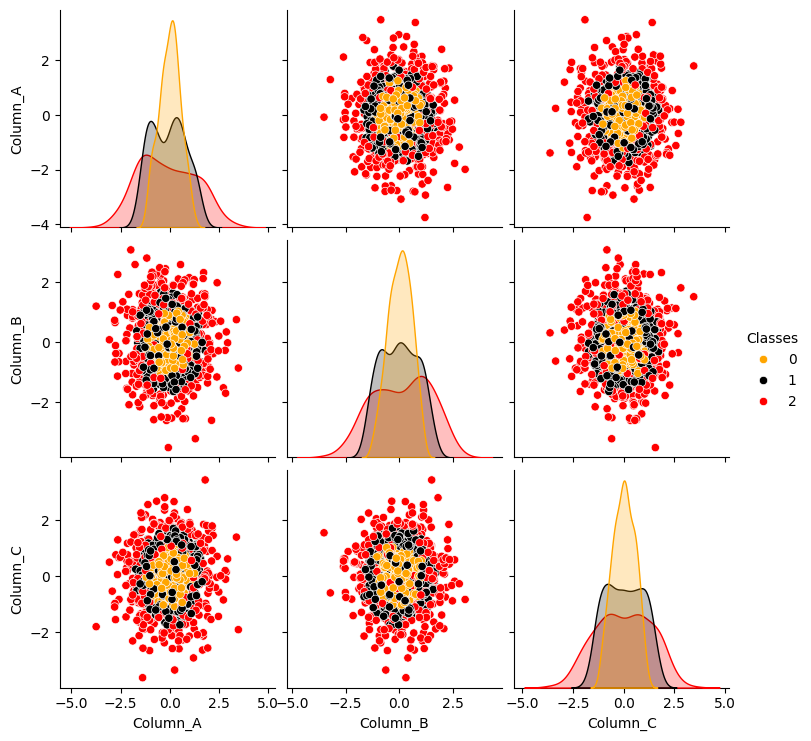

In [720]:
sns.pairplot(data = df, hue = 'Classes', palette=['orange', 'k', 'red'])

# The hist Plots of the features

array([[<Axes: title={'center': 'Column_A'}>,
        <Axes: title={'center': 'Column_B'}>],
       [<Axes: title={'center': 'Column_C'}>,
        <Axes: title={'center': 'Classes'}>]], dtype=object)

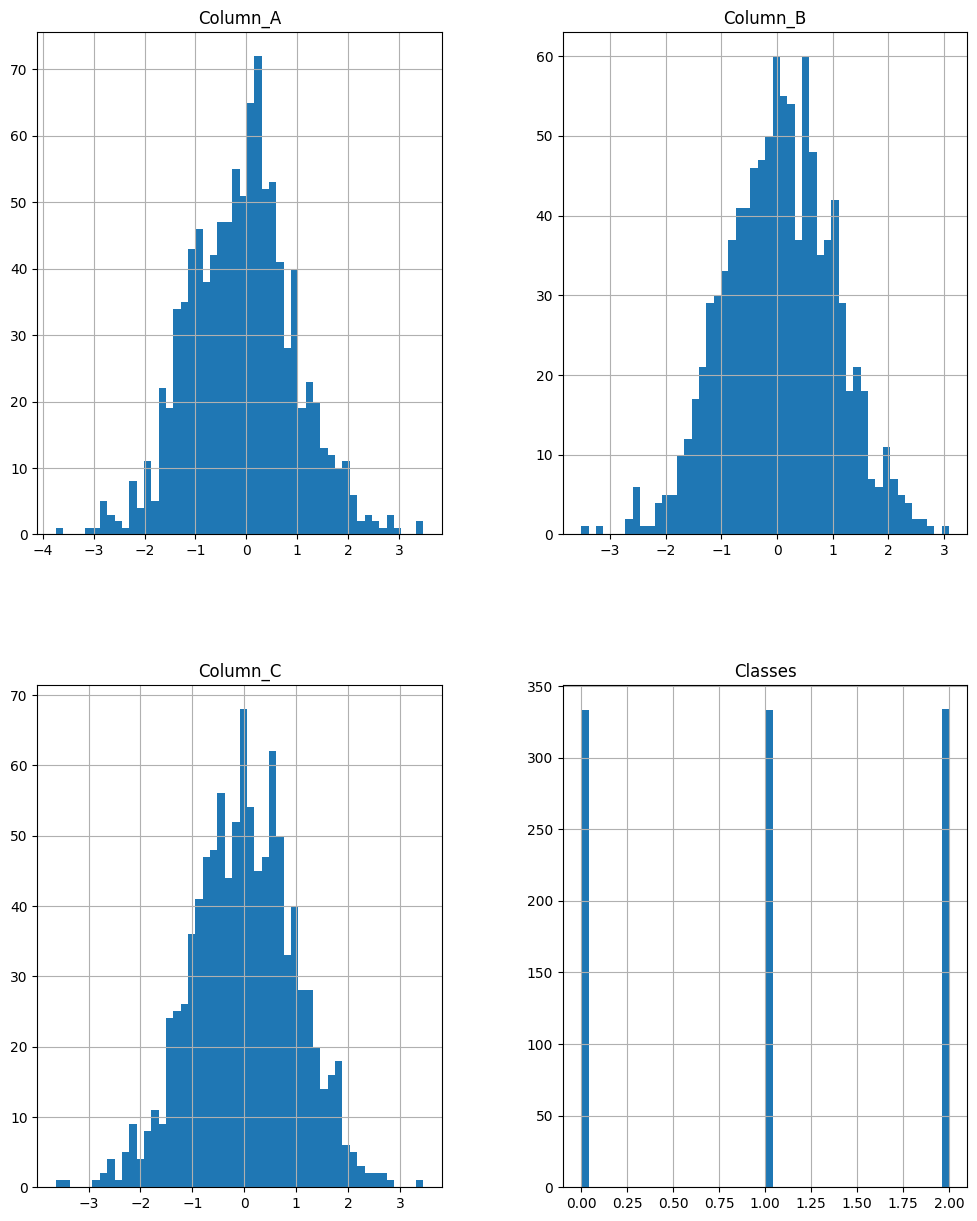

In [73]:
df.hist(bins=50, figsize=(12, 15))

# Calculate mean and Variance of features in each class

In [5]:
vars = df.groupby('Classes').var()
means = df.groupby('Classes').mean()

In [6]:
print('var_per_column_per_class:\n', vars, '\n','\nmean_per_column_per_class:\n', means)

var_per_column_per_class:
          Column_A  Column_B  Column_C
Classes                              
0        0.296292  0.313098  0.277034
1        0.755189  0.951999  0.778102
2        1.847907  2.172605  1.652793 
 
mean_per_column_per_class:
          Column_A  Column_B  Column_C
Classes                              
0       -0.009694  0.014547  0.003805
1        0.046102  0.049794  0.010008
2        0.027642  0.039819  0.080815


# The Naive Bayes algorithm implementation

In [7]:
def NB_apply(data, sample):
 P_NB_list = []
 for cls in sorted(list(data['Classes'].unique())):
  prior = (data.loc[data['Classes']==cls]['Classes'].count()) / (data['Classes'].count())
  P_LH_list = []
  for k in range(len(data.axes[1])-1):
   P_LH = 1/(np.sqrt(2*np.pi*(vars.iat[cls,k]))) * np.exp((-(sample[k]-(means.iat[cls,k]))**2)/(2*(vars.iat[cls,k])))
   P_LH_list.append(P_LH)  
   if (len(P_LH_list) == len(data.axes[1])-1):
    P = np.prod(P_LH_list) * prior
    P_NB_list.append(P)
    if len(data['Classes'].unique()) == (len(P_NB_list)):
     P_max = max(P_NB_list)
     inx = P_NB_list.index(P_max)
     return (sorted(list(data['Classes'].unique())))[inx]  

# Predict the classes

In [8]:
data_predic = []
for rw in df.values:
 data_predic.append(NB_apply(df, rw))
df_predic = pd.DataFrame(data_predic)

# Calculate the accuracy of the Naive Bayes

## The accuracy by manual method:

In [9]:
sum_true_predict = 0
for i, val in enumerate(df['Classes']):
 if (df_predic.iat[i, 0] == val):
    sum_true_predict += 1
print('The accuracy is: ', sum_true_predict / len(df.index))   

The accuracy is:  0.917


## The accuracy by sklearn library:

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('The accuracy is: ', accuracy_score(df['Classes'], df_predic), '\n')
print('The confusion matrix is: \n', confusion_matrix(df['Classes'], df_predic), '\n')
print('The classification report is: \n', classification_report(df['Classes'], df_predic), '\n')

The accuracy is:  0.917 

The confusion matrix is: 
 [[297  36   0]
 [  0 327   6]
 [  0  41 293]] 

The classification report is: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       333
           1       0.81      0.98      0.89       333
           2       0.98      0.88      0.93       334

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000
 

